### In this practice we are going to apply k-means on a real data set

#### Load the data set and necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 

In [2]:
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


### Pre-processing Phase

At very initial step, we can see that *Address* is a **categorical feature** which is not suitable in K-means, as it 
uses **Eucledean distance**; so we will remove ir from the *Data Frame*

About *drop()*: Remove rows or columns by specifying label names and corresponding axis, or by directly specifying index or column names. so if:
* axis = 0: it drops an *index* or a *row*
* axis = 1: it drops a *label* or a *column*

In [3]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


#### Normalization

As the features are varied in the scale and amount, we need to re-shape them using *normalization techniques* like **Standard Scaler()**; so that all the numerical features will be put in a unique scale to do further mathematical calculations more precisely.

*Note*: We apply normalization on all features except *Customer Id*

In [9]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.52379654,
        -0.57652509,  0.70631684],
       [ 1.48949049, -0.76634938,  2.5737211 , ..., -0.52379654,
         0.39138677, -0.54706377],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  1.90913822,
         1.59755385, -1.80044438],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  1.90913822,
         3.45892281, -1.80044438],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.52379654,
        -1.08281745,  0.70631684],
       [ 2.1116364 , -0.76634938,  1.09746566, ..., -0.52379654,
        -0.2340332 , -0.54706377]])

### Modeling Phase

In [5]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Clus_dataSet)
labels = k_means.labels_
print(labels)

[2 1 0 2 1 1 2 2 2 1 0 2 2 2 0 2 2 2 1 2 2 2 0 1 1 2 2 2 2 2 2 1 0 2 2 2 0
 0 2 1 0 1 2 1 2 1 2 2 2 2 1 1 0 2 0 0 0 2 2 2 1 2 1 1 2 2 2 0 2 0 2 2 2 2
 2 2 2 2 1 2 2 0 1 2 1 2 2 2 0 0 2 2 0 0 2 2 2 2 0 2 0 1 2 0 0 1 2 2 2 2 2
 2 2 0 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 1 2 2 0
 2 2 2 1 0 2 2 2 2 1 0 0 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 0 2 2 0 1 0 2 2 1 0
 1 2 2 2 2 2 1 2 0 2 2 2 1 1 2 1 2 0 2 2 0 2 1 2 0 2 2 2 2 2 0 0 1 2 2 0 1
 2 2 2 2 1 2 2 0 2 2 2 2 1 2 2 0 1 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 1 0 2 0 2
 2 2 1 2 0 1 0 2 1 2 2 0 2 2 2 2 0 0 0 2 2 2 1 2 2 1 2 1 2 2 1 2 2 2 0 2 2
 0 2 0 1 2 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 0 2 0 1 2 0 2 2 2 0 0 2 2 2 1 0
 2 2 0 2 1 2 2 2 2 2 0 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 0 2 0 2 2 2 1 1 2
 0 2 1 0 0 2 2 2 0 2 2 2 2 2 1 2 1 2 2 2 2 0 2 0 2 2 2 1 2 2 2 2 0 2 2 0 0
 1 2 2 2 2 2 0 0 2 1 0 1 2 2 0 2 2 1 1 2 0 2 2 1 2 0 2 1 2 2 2 1 2 2 2 2 1
 2 0 2 2 2 2 1 0 2 2 1 2 0 2 2 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 2 0 2 2 2 0 2
 0 2 2 2 2 2 1 0 0 2 1 2 

Now we want to assign those labels to their correspoding Samples

In [6]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,2
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,2
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1


In [7]:
# To check the final Clustering means for each cluster
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
2,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


### Plot the data

Now we want to plot the data based on their cluster groups.
We are going to vary every sample size on the basis of their **Education** feature. Furthermore, samples with higher education values will be plotted in bigger circles. 

*Note*: We ignored *Customer Id* in the previous section and X data set starts with the **Age** feature as the **index 0**

*Note*: We will plot **Age** vs **Income** for each sample.

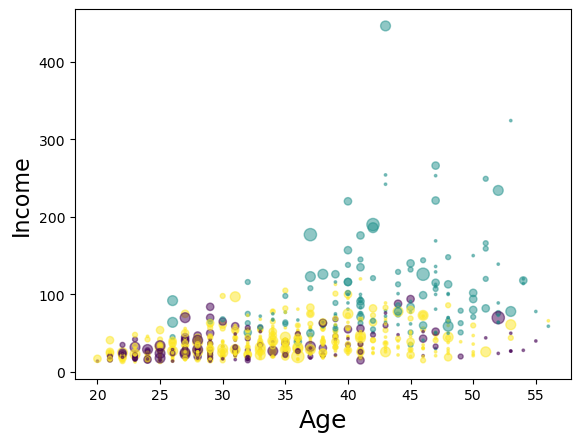

In [11]:
area = np.pi * (X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()